In [180]:
import pickle 
import numpy as np
import matplotlib.pyplot as plt
import json
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from itertools import cycle

evaluation_for = "test"
article_type= "tops"
attribute = "sleeve_style"

base_folder = '/rapid_data/myntra/myntra_data/'
train_type_list = ['progressive', 'individual', 'multilabel']#, 'multi-label']
prediction_store_path_dict = {}
prediction_store_path_dict['progressive'] = base_folder + article_type+'/'+article_type+'_'+attribute+'/evaluation-progressive/'+evaluation_for+'/predictions.txt'
prediction_store_path_dict['individual'] = base_folder + article_type+'/'+article_type+'_'+attribute+'/evaluation-v3/'+evaluation_for+'/predictions.txt'
prediction_store_path_dict['multilabel'] = base_folder + article_type+'/'+article_type+'_'+attribute+'/evaluation-multilabel/'+evaluation_for+'/predictions.txt'


test_file_path = base_folder + article_type+'/'+article_type+'_'+attribute+'/'+article_type+'_'+attribute+'_new_'+evaluation_for+'.txt'
label_map_file = base_folder + article_type+'/'+article_type+'_'+attribute+ '/'+article_type+'_'+attribute+'_label_map.txt'

In [181]:
test_list = []
with open(test_file_path) as f:
        test_list = f.readlines()
len(test_list)

labels = {}
with open(label_map_file) as f:
        labels = f.readline()
labels  = json.loads(labels)
label_map = {v: k for k, v in labels.iteritems()}

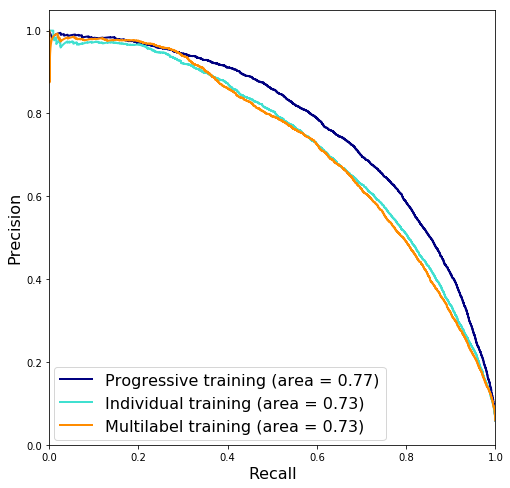

In [182]:
precision = dict()
recall = dict()
average_precision = dict()
n_classes = Y_test.shape[1]
precision_avg = 0

colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

plt.figure(figsize=(8,8))
lines = []
labels = []
index = 0
for train_type , color in zip(train_type_list, colors):

    all_results = []
    with open(prediction_store_path_dict[train_type], 'r') as f:
                #all_results = f.read().splitlines()
                all_results = pickle.load(f)
                
    if train_type == 'multilabel':
        Y_true_list = [result[2] for result in all_results]
    else:
        Y_true_list = [int(line.split(' ')[1]) for line in test_list]

    temp = np.array(Y_true_list)
    Y_test = np.zeros((temp.size, temp.max()+1))
    Y_test[np.arange(temp.size),temp] = 1
 
    Y_pred_list = [result[1] for result in all_results] 
    y_pred = np.array(Y_pred_list)
    
    precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test.ravel(),
    y_pred.ravel())
    average_precision["micro"] = average_precision_score(Y_test, y_pred,
                                                     average="micro")
    
    l, = plt.plot(recall["micro"], precision["micro"], color=color, lw=2)
    lines.append(l)
    labels.append(train_type.title()+' training (area = {0:0.2f})'
                  ''.format(average_precision["micro"]))
    count = index+1
    
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall', size = 16)
plt.ylabel('Precision', size = 16)
# plt.title("Precision-Recall curve for the " +  attribute.replace('_', ' ').title() + " attribute of " + article_type.title() )
# plt.title("Precision-Recall curve for the " +  attribute.title() + " attribute of " + article_type.title() )
plt.legend(lines, labels, loc=(0.01, 0.01), prop=dict(size=16))


plt.show()